## ライブラリのインポート

In [1]:
#①ライブラリをインポートする
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD,Adam

from keras.callbacks import TensorBoard
import keras.backend as K

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## データセットの読み込み

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 13s 1us/step


## 画像の可視化

In [10]:
#②画像を表示する関数
%matplotlib inline
def img_show(img):
    imshow(img)

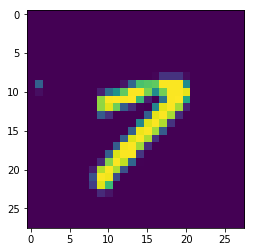

In [13]:
#画像の可視化を行う
img_show(X_train[29].reshape(28,28))

In [14]:
#print文で出力してみる
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

## 学習のために28x28を1次元にする

In [16]:
#③
x_train = X_train.reshape(60000, 784)
x_test = X_test.reshape(10000, 784)


## 正規化

In [17]:
#④
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

## ラベルをカテゴリカル化する

In [18]:
#ラベルをprint文で出力してみる
print(y_train)

[5 0 4 ... 5 6 8]


In [19]:
#ラベルをカテゴリカル化する
y_train_label = np_utils.to_categorical(y_train)
y_test_label = np_utils.to_categorical(y_test)

In [20]:
#print文で出力してみる
print(y_train_label)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


## MLP（Multi Layer Perceptron）モデルを構築する

In [21]:
#⑤モデルの定義
def build_multilayer_perceptron():
    model = Sequential()

    model.add(Dense(512, input_shape=(784,)))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    return model

In [22]:
#⑥
model = build_multilayer_perceptron()

## モデルの構造を確認する

In [23]:
#⑦
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [24]:
#⑧
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

## 学習する

In [25]:
history = model.fit(x_train, y_train_label,
                   batch_size=128,
                   epochs=10,
                   verbose=1,
                   validation_data=(x_test, y_test_label))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 44us/step - loss: 1.0966 - acc: 0.7373 - val_loss: 0.5939 - val_acc: 0.8652
Epoch 2/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.5442 - acc: 0.8600 - val_loss: 0.4293 - val_acc: 0.8948
Epoch 3/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.4437 - acc: 0.8797 - val_loss: 0.3706 - val_acc: 0.9027
Epoch 4/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.3962 - acc: 0.8898 - val_loss: 0.3385 - val_acc: 0.9085
Epoch 5/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.3671 - acc: 0.8970 - val_loss: 0.3165 - val_acc: 0.9142
Epoch 6/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.3446 - acc: 0.9037 - val_loss: 0.3001 - val_acc: 0.9165
Epoch 7/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.3291 - acc: 0.9067 - val_loss: 0.2867 - val_acc

## 精度を確認する

In [71]:
score = model.evaluate(x_test, y_test_label, verbose=0)

In [72]:
# 結果の値を表示する
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.25873564811348915
Test accuracy: 0.9288


## 予測結果を実際に見てみる

In [73]:
predicts = model.predict_classes(x_test)

predict label is 9
label is 9


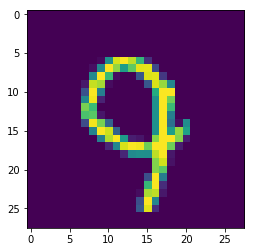

In [74]:
#⑩
print("predict label is {0}".format(predicts[999]))
print("label is {0}".format(y_test[999]))
img_show(X_test[999].reshape(28,28))

## 間違えたものを取り出す

In [75]:
#⑪
wrongs = []
for i, (x,y) in enumerate(zip(y_test,predicts)):
    if x != y:
        wrongs.append((i,(x,y)))

In [76]:
len(wrongs)

712

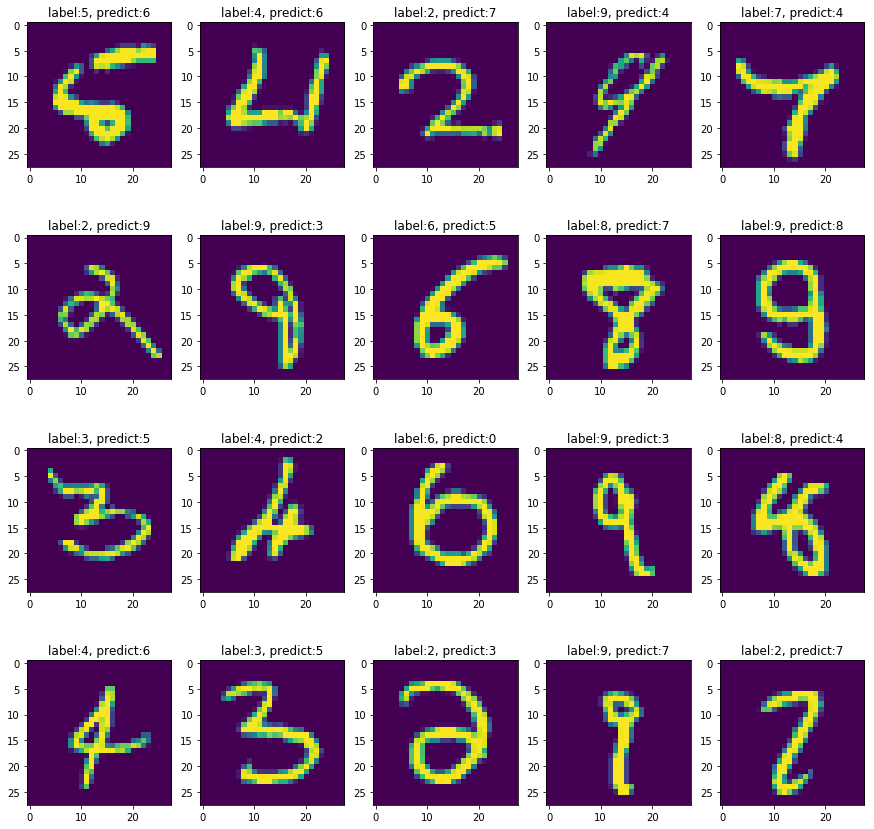

In [77]:
#⑫間違えた結果を可視化する
f = plt.figure(figsize=(15,15))
for i ,(index, (label, predict)) in enumerate(wrongs[:20]):
    i += 1
    axes = f.add_subplot(4,5,i)
    axes.set_title("label:{0}, predict:{1}".format(label, predict))
    img_show(X_test[index].reshape(28,28))

## 層を一層増やす

In [45]:
#⑬層を一層追加したニューラルネットワークのモデルを作る
def build_multilayer_perceptron():
    model = Sequential()
    model.add(Dense(512, input_shape=(784,)))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    model.add(Dense(512)) 
    model.add(Activation('relu')) 
    model.add(Dropout(0.2))

    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    return model

## モデルをビルドする

In [46]:
#⑭
deep_model = build_multilayer_perceptron()

In [47]:
#⑮
deep_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_3 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
__________

In [48]:
#⑯
deep_model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [49]:
#⑰
history = deep_model.fit(x_train, y_train_label,
                   batch_size=128,
                   epochs=10,
                   verbose=1,
                   validation_data=(x_test, y_test_label))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.2525 - acc: 0.9246 - val_loss: 0.1067 - val_acc: 0.9677
Epoch 2/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.1007 - acc: 0.9681 - val_loss: 0.0773 - val_acc: 0.9747
Epoch 3/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.0712 - acc: 0.9776 - val_loss: 0.0710 - val_acc: 0.9777
Epoch 4/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.0556 - acc: 0.9821 - val_loss: 0.0708 - val_acc: 0.9780
Epoch 5/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.0458 - acc: 0.9853 - val_loss: 0.0651 - val_acc: 0.9794
Epoch 6/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.0379 - acc: 0.9875 - val_loss: 0.0637 - val_acc: 0.9816
Epoch 7/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.0332 - acc: 0.9895 - val_loss: 0.0630 - val_acc

## 精度を確認する

In [78]:
deep_score = deep_model.evaluate(x_test, y_test_label, verbose=0)
print('Test loss:', deep_score[0])
print('Test accuracy:', deep_score[1])

Test loss: 0.06148152798827905
Test accuracy: 0.9823


## 予測結果を取得する

In [83]:
#予測結果をdeep_predictsに入れる(前半ではpredicts)
deep_predicts = deep_model.predict_classes(x_test)
print("predict label is {0}".format(deep_predicts[999]))
print("label is {0}".format(y_test[999]))

predict label is 9
label is 9


## 間違いを取得する

In [84]:
#間違いのリストをdeep_wrongsに格納する(前半ではwrongs)
deep_wrongs = []
for i, (x,y) in enumerate(zip(y_test,deep_predicts)):
    if x != y:
        deep_wrongs.append((i,(x,y)))
print(len(deep_wrongs))

177


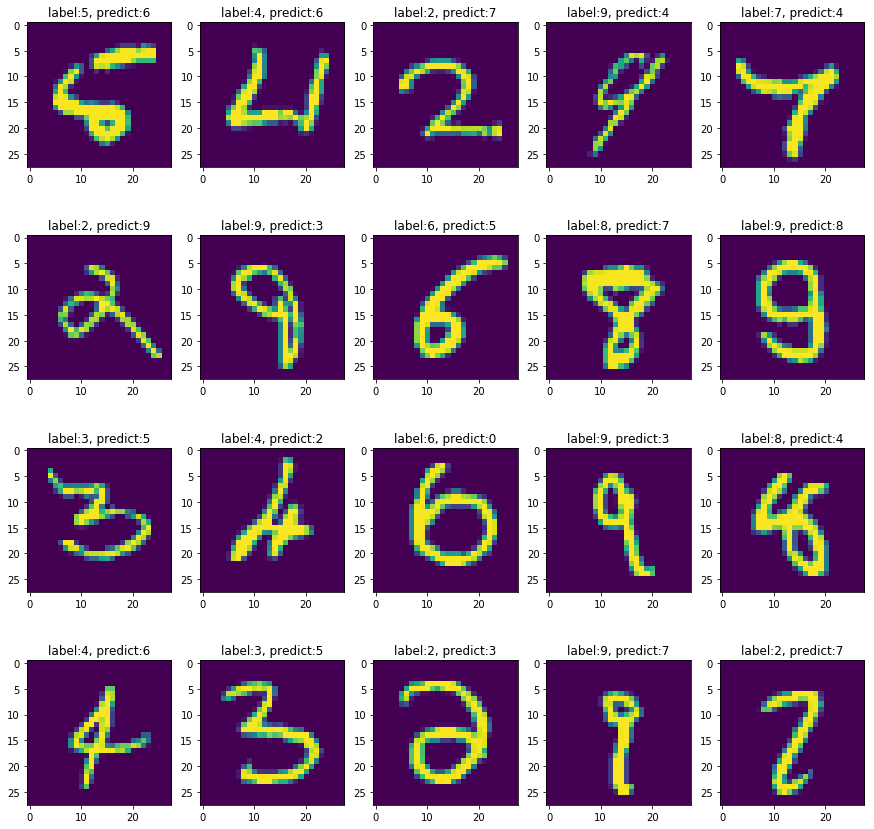

In [85]:
f = plt.figure(figsize=(15,15))
for i ,(index, (label, predict)) in enumerate(wrongs[:20]):
    i += 1
    axes = f.add_subplot(4,5,i)
    axes.set_title("label:{0}, predict:{1}".format(label, predict))
    img_show(X_test[index].reshape(28,28))

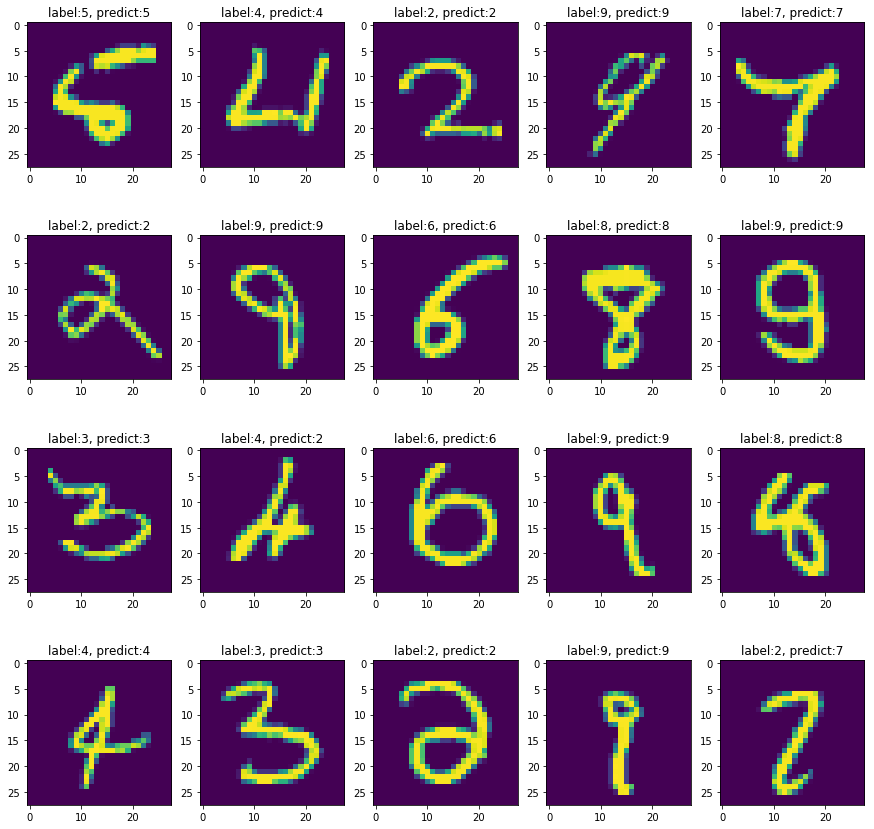

In [86]:
#⑱前半のニューラルネットワークで間違えたものがどう判定されたか確認する
f = plt.figure(figsize=(15,15))
for i ,(index, (label, predict)) in enumerate(wrongs[:20]):
    i += 1
    axes = f.add_subplot(4,5,i)
    axes.set_title("label:{0}, predict:{1}".format(label, deep_predicts[index]))
    axes.imshow(X_test[index].reshape(28,28))